<a href="https://colab.research.google.com/github/Bruceirshaidat/Vegetable_Image_Classification/blob/main/Vegetable_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
)
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [2]:
import os

print(os.path.getsize("archive.zip"))


560031432


In [3]:
zip_path = 'archive.zip'
extract_dir = '.'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"'{zip_path}' unzipped to '{extract_dir}'")

'archive.zip' unzipped to '.'


In [4]:
print(os.listdir('.'))

['.config', 'archive.zip', 'Vegetable Images', 'sample_data']


In [5]:
main_dir = 'Vegetable Images'
train_dir = os.path.join(main_dir, 'train')
valid_dir = os.path.join(main_dir, 'validation')
test_dir = os.path.join(main_dir, 'test')


In [6]:
def count_images(directory):

    categories = os.listdir(directory)

    category_count = {category: len(os.listdir(os.path.join(directory, category))) for category in categories}
    return category_count

In [7]:
train_count = count_images(train_dir)
test_count = count_images(test_dir)
validation_count = count_images(valid_dir)
print(f"Train sample count : {train_count}\n\n")
print(f"Test sample count : {test_count}\n\n")
print(f"Validation sample count : {validation_count}")


Train sample count : {'Bottle_Gourd': 1000, 'Papaya': 1000, 'Cucumber': 1000, 'Potato': 1000, 'Broccoli': 1000, 'Bean': 1000, 'Bitter_Gourd': 1000, 'Brinjal': 1000, 'Tomato': 1000, 'Radish': 1000, 'Capsicum': 1000, 'Pumpkin': 1000, 'Cabbage': 1000, 'Carrot': 1000, 'Cauliflower': 1000}


Test sample count : {'Bottle_Gourd': 200, 'Papaya': 200, 'Cucumber': 200, 'Potato': 200, 'Broccoli': 200, 'Bean': 200, 'Bitter_Gourd': 200, 'Brinjal': 200, 'Tomato': 200, 'Radish': 200, 'Capsicum': 200, 'Pumpkin': 200, 'Cabbage': 200, 'Carrot': 200, 'Cauliflower': 200}


Validation sample count : {'Bottle_Gourd': 200, 'Papaya': 200, 'Cucumber': 200, 'Potato': 200, 'Broccoli': 200, 'Bean': 200, 'Bitter_Gourd': 200, 'Brinjal': 200, 'Tomato': 200, 'Radish': 200, 'Capsicum': 200, 'Pumpkin': 200, 'Cabbage': 200, 'Carrot': 200, 'Cauliflower': 200}


In [8]:
def get_image_paths_and_labels(parent_dir):
    data = []
    for class_name in os.listdir(parent_dir):
        class_path = os.path.join(parent_dir, class_name)
        if os.path.isdir(class_path):
            file_paths = [os.path.join(class_path, file) for file in os.listdir(class_path)]
            labels = [class_name] * len(file_paths)
            data.extend(zip(labels, file_paths))
    return data

In [9]:
train_data=get_image_paths_and_labels(train_dir)
df_train=pd.DataFrame(train_data,columns=['class','image'])
df_train.head()

class                                         image
0  Bottle_Gourd  Vegetable Images/train/Bottle_Gourd/0499.jpg
1  Bottle_Gourd  Vegetable Images/train/Bottle_Gourd/0748.jpg
2  Bottle_Gourd  Vegetable Images/train/Bottle_Gourd/0213.jpg
3  Bottle_Gourd  Vegetable Images/train/Bottle_Gourd/0608.jpg
4  Bottle_Gourd  Vegetable Images/train/Bottle_Gourd/0230.jpg

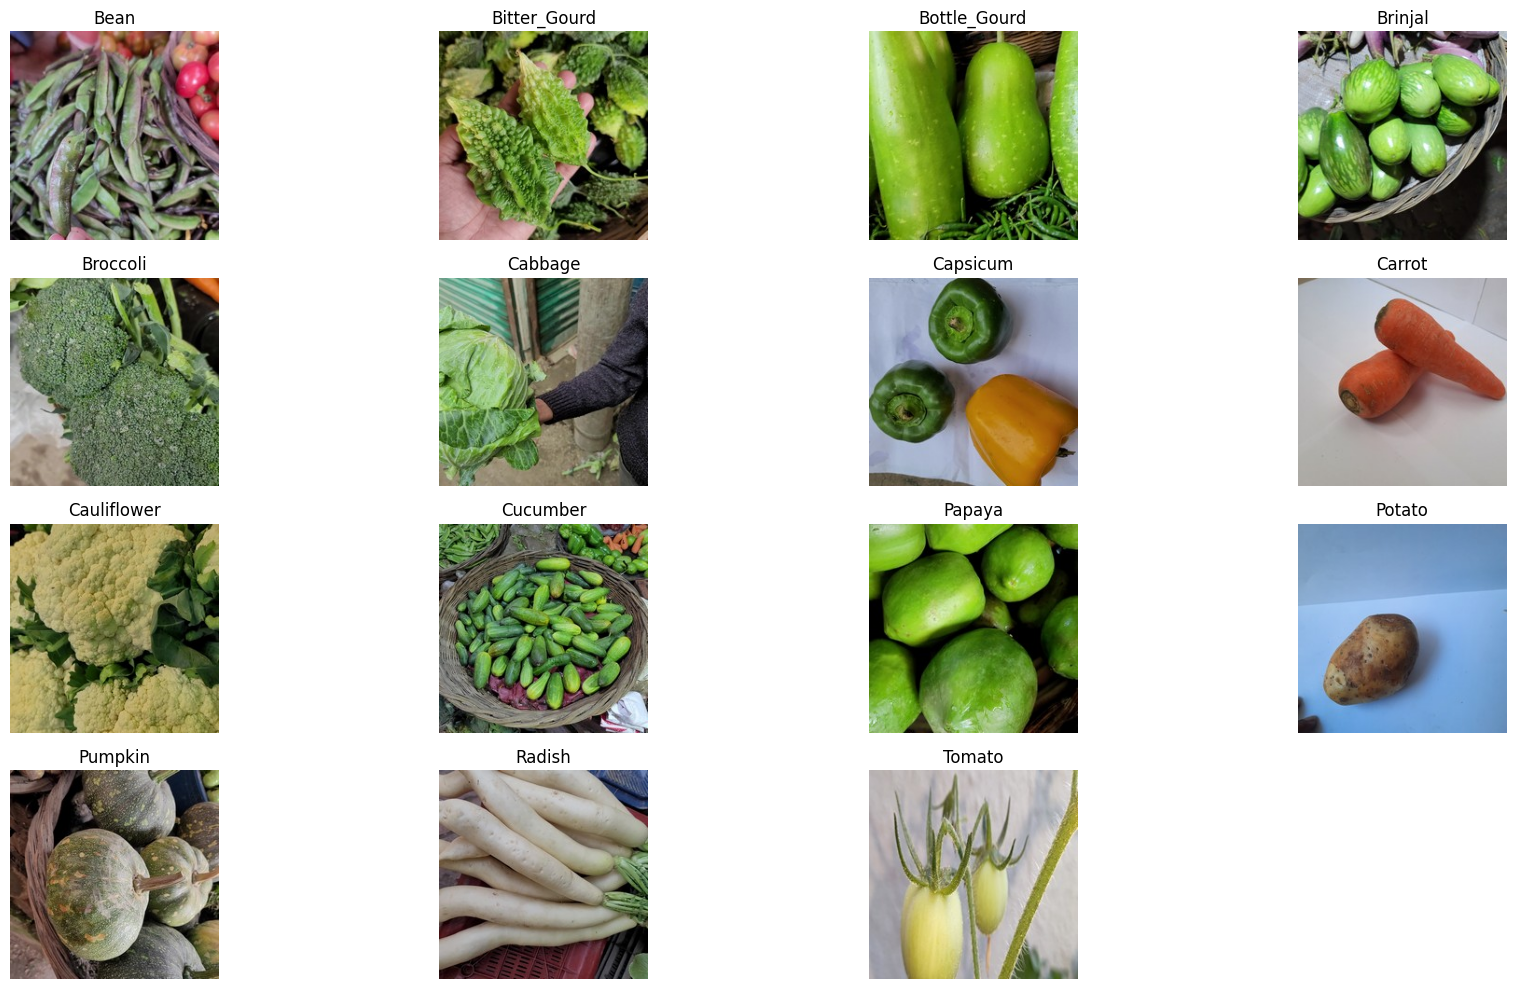

In [10]:
unique_classes = df_train['class'].unique()

sample_data = df_train.groupby('class').apply(lambda x: x.sample(1)).reset_index(drop=True)


plt.figure(figsize=(18, 10))

for i, (label, image_path) in enumerate(zip(sample_data['class'], sample_data['image'])):
    plt.subplot(4, 4, i+1)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
valid_data = get_image_paths_and_labels(valid_dir)

df_valid = pd.DataFrame(valid_data, columns=['class', 'image'])

df_valid

class                                              image
0     Bottle_Gourd  Vegetable Images/validation/Bottle_Gourd/1335.jpg
1     Bottle_Gourd  Vegetable Images/validation/Bottle_Gourd/1315.jpg
2     Bottle_Gourd  Vegetable Images/validation/Bottle_Gourd/1219.jpg
3     Bottle_Gourd  Vegetable Images/validation/Bottle_Gourd/1357.jpg
4     Bottle_Gourd  Vegetable Images/validation/Bottle_Gourd/1288.jpg
...            ...                                                ...
2995   Cauliflower   Vegetable Images/validation/Cauliflower/1333.jpg
2996   Cauliflower   Vegetable Images/validation/Cauliflower/1374.jpg
2997   Cauliflower   Vegetable Images/validation/Cauliflower/1435.jpg
2998   Cauliflower   Vegetable Images/validation/Cauliflower/1355.jpg
2999   Cauliflower   Vegetable Images/validation/Cauliflower/1307.jpg

[3000 rows x 2 columns]

In [12]:
test_data = get_image_paths_and_labels(test_dir)

df_test = pd.DataFrame(test_data, columns=['class', 'image'])

df_test

class                                        image
0     Bottle_Gourd  Vegetable Images/test/Bottle_Gourd/1003.jpg
1     Bottle_Gourd  Vegetable Images/test/Bottle_Gourd/1077.jpg
2     Bottle_Gourd  Vegetable Images/test/Bottle_Gourd/1110.jpg
3     Bottle_Gourd  Vegetable Images/test/Bottle_Gourd/1165.jpg
4     Bottle_Gourd  Vegetable Images/test/Bottle_Gourd/1084.jpg
...            ...                                          ...
2995   Cauliflower   Vegetable Images/test/Cauliflower/1231.jpg
2996   Cauliflower   Vegetable Images/test/Cauliflower/1195.jpg
2997   Cauliflower   Vegetable Images/test/Cauliflower/1098.jpg
2998   Cauliflower   Vegetable Images/test/Cauliflower/1078.jpg
2999   Cauliflower   Vegetable Images/test/Cauliflower/1072.jpg

[3000 rows x 2 columns]

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)

valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
     shuffle=True,
     seed=42

)
valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical' ,
     seed=42

)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical' ,
     seed=42

)


Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


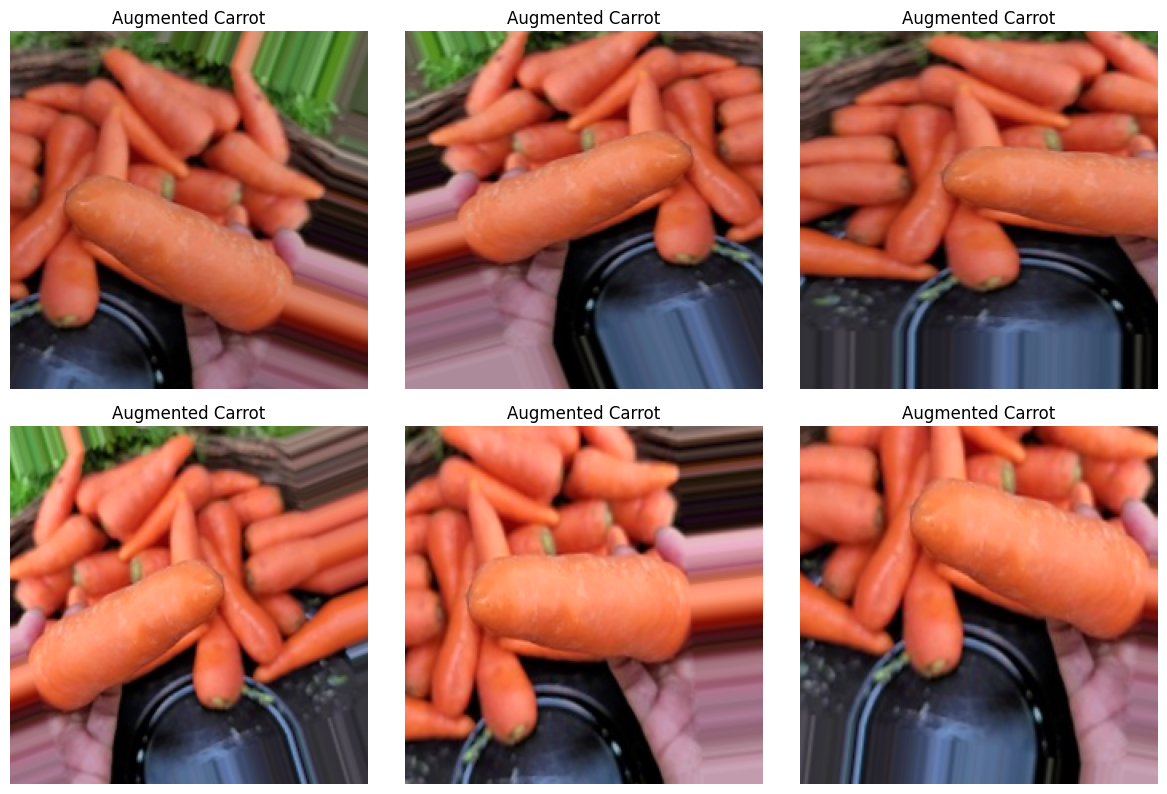

In [14]:
carrot_dir = os.path.join(train_dir, 'Carrot')
img_path = os.path.join(carrot_dir, os.listdir(carrot_dir)[5])


img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)


augmented_images = train_datagen.flow(x, batch_size=1)


plt.figure(figsize=(12, 12))
for i in range(6):
    batch = next(augmented_images)
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch[0])
    plt.title("Augmented Carrot")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
num_classes = len(train_generator.class_indices)
model=Sequential()
model.add(Conv2D(32,(3,3),strides=1,padding='same',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(64,(3,3),strides=1,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(128,(3,3),strides=1,padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(256,(3,3),strides=1,padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Conv2D(512,(3,3),strides=1,padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=num_classes,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 512)      │             

 Total params: 2,660,367 (10.15 MB)

 Trainable params: 2,658,255 (10.14 MB)

 Non-trainable params: 2,112 (8.25 KB)

In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1)
history=model.fit(train_generator,
                  validation_data=valid_generator,
                  epochs=20,
                  callbacks=[early_stop,reduce_lr])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 241s 478ms/step - accuracy: 0.3971 - loss: 2.1045 - val_accuracy: 0.3823 - val_loss: 3.5191 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 231s 440ms/step - accuracy: 0.6807 - loss: 1.0238 - val_accuracy: 0.3893 - val_loss: 3.4743 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 205s 436ms/step - accuracy: 0.7823 - loss: 0.7053 - val_accuracy: 0.5703 - val_loss: 1.9507 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 206s 439ms/step - accuracy: 0.8397 - loss: 0.5301 - val_accuracy: 0.7610 - val_loss: 0.8579 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 440ms/step - accuracy: 0.8751 - loss: 0.4158 - val_accuracy: 0.8803 - val_loss: 0.3952 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 205s 438ms/step - accuracy: 0.9030 - loss: 0.3388 - val_accuracy: 0.7807 - val_loss: 0.9789 - learning_rate: 0.0010
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 204s 435ms/step - accura

In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9935 - loss: 0.0234
Test Accuracy: 0.9930
Test Loss: 0.0285


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


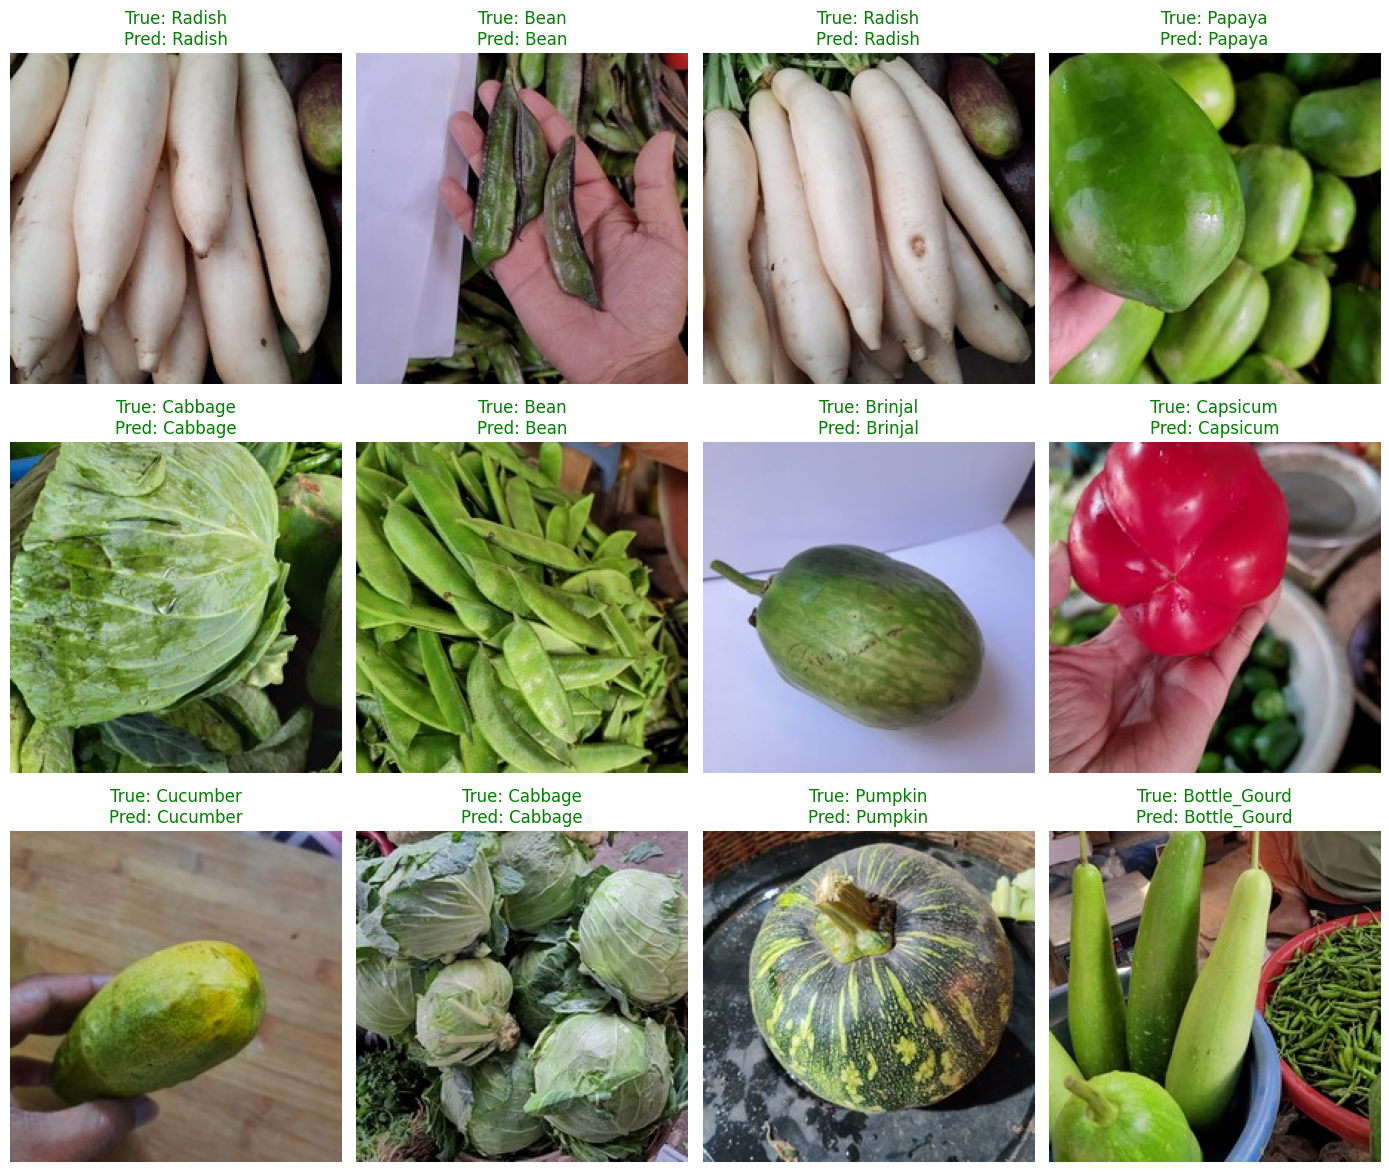

In [22]:
class_labels = list(train_generator.class_indices.keys())


sample_df = df_test.sample(n=12, random_state=42).reset_index(drop=True)

plt.figure(figsize=(14, 12))

for i, row in sample_df.iterrows():
    img_path = row['image']
    true_class = row['class']


    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)


    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_index]


    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    title = f"True: {true_class}\nPred: {predicted_class}"
    color = 'green' if true_class == predicted_class else 'red'
    plt.title(title, color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


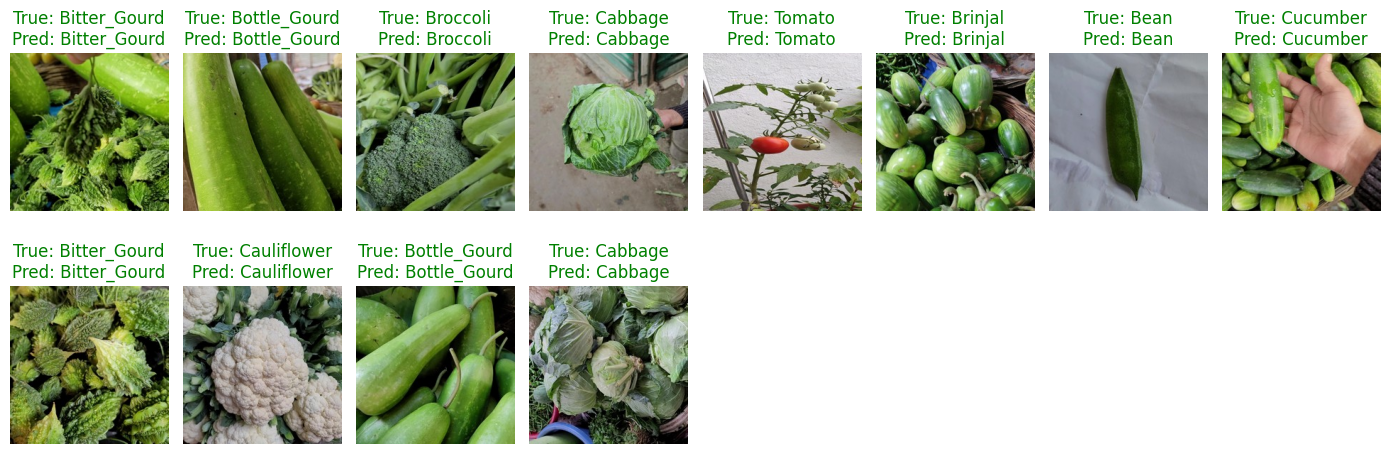

In [23]:
class_labels = list(train_generator.class_indices.keys())
sample_df = df_test.sample(n=12).reset_index(drop=True)
plt.figure(figsize=(14, 12))
for i, row in sample_df.iterrows():
    img_path = row['image']
    true_class = row['class']


    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)


    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_index]


    plt.subplot(5, 8, i+1)
    plt.imshow(img)
    title = f"True: {true_class}\nPred: {predicted_class}"
    color = 'green' if true_class == predicted_class else 'red'
    plt.title(title, color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
